In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensembles

## Bagging

Objetivo é gerar várias bases pegando observações aleatórias da báse original para simular diversas árvores de decisão: Random Forest

In [8]:
titanic = pd.read_csv(r'bases\titanic.csv')
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,N,3,male,22.000000,1,0,7.2500,S
1,Y,1,female,38.000000,1,0,71.2833,C
2,Y,3,female,26.000000,0,0,7.9250,S
3,Y,1,female,35.000000,1,0,53.1000,S
4,N,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,N,2,male,27.000000,0,0,13.0000,S
887,Y,1,female,19.000000,0,0,30.0000,S
888,N,3,female,29.699118,1,2,23.4500,S
889,Y,1,male,26.000000,0,0,30.0000,C


## Separando base Treino e Teste

In [29]:
# Transforma as variáveis Categóricas em Categóricas Numéricas

titanic_dummie = pd.get_dummies(titanic, drop_first=True)
titanic_dummie

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Y
0,3,1,22.000000,1,0,7.2500,2,0
1,1,0,38.000000,1,0,71.2833,0,1
2,3,0,26.000000,0,0,7.9250,2,1
3,1,0,35.000000,1,0,53.1000,2,1
4,3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,0
887,1,0,19.000000,0,0,30.0000,2,1
888,3,0,29.699118,1,2,23.4500,2,0
889,1,1,26.000000,0,0,30.0000,0,1


In [30]:
from sklearn.model_selection import train_test_split # to split data into training and testing sets

var_x = titanic_dummie.drop('Survived_Y', axis=1)

X_train, X_test, y_train, y_test = train_test_split(var_x, 
                                                    titanic_dummie['Survived_Y'], 
                                                    #random_state=123, 
                                                    test_size=0.20)

In [31]:
len(X_train), len(X_test)

(712, 179)

## Aplicando Modelo Random Forest

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [36]:
from sklearn.ensemble import RandomForestClassifier

# n_estimator -> quantidade de árvores a serem geradas pelo bootstrap

rf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)

In [33]:
# Predict na Base de Treino
y_pred_train = rf.predict(X_train)

# Predict na Base de Teste
y_pred_test = rf.predict(X_test)

# ROC

## Base Treino

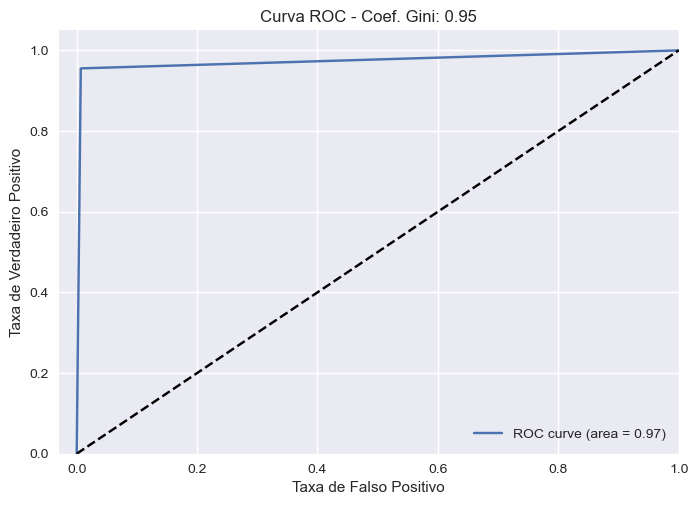

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.style.use('seaborn')

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = roc_auc_score(y_train, y_pred_train)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

## Base Treino

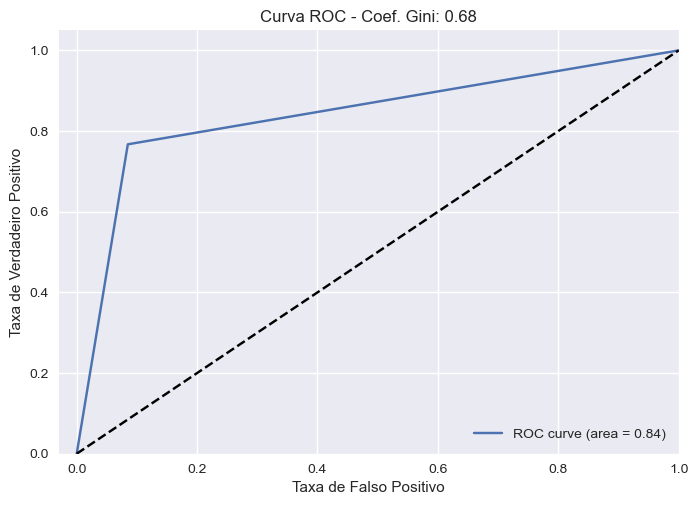

In [38]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()